In [1]:
import seaborn as sns
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt

#import dataframe as df


In [24]:
file = 'rs20_minus_rs1000_yr6-25_10S-10N_t2m-var_cor-lhflx-t2m_cor-shflx-t2m_cor-lhflx-sm.nc'
nc         = xr.open_dataset(file)
t2m_var    = nc.variables['t2m_var'].values[:]
lhflx_t2m  = nc.variables['lhflx_t2m'].values[:]
t2m_var    = np.where(t2m_var > 1e35, np.nan, t2m_var) # mask out FillValue
lhflx_t2m  = np.where(lhflx_t2m > 1e35, np.nan, lhflx_t2m) # mask out FillValue


/glade/work/kwenwen/venvs/my_venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/glade/work/kwenwen/venvs/my_venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


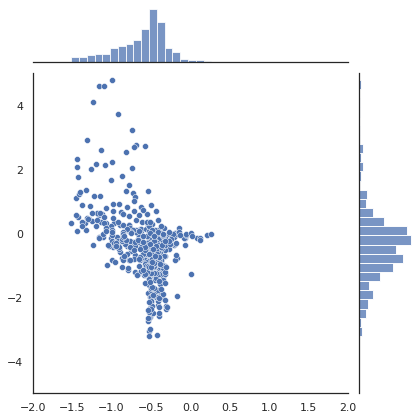

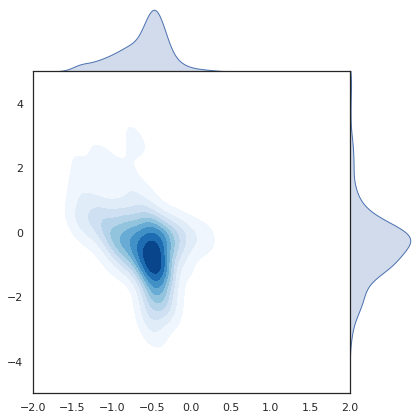

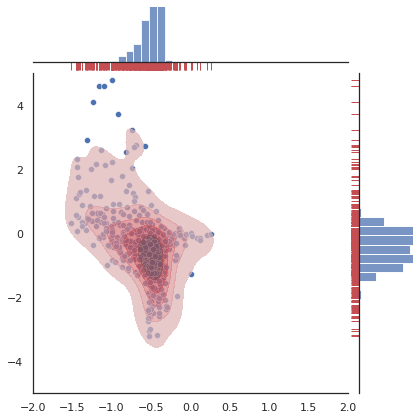

In [30]:
sns.set_style('white')
sns.jointplot(x=lhflx_t2m, y=t2m_var, kind='scatter', xlim=(-2, 2), ylim=(-5, 5))
sns.jointplot(x=lhflx_t2m, y=t2m_var, kind='kde', space=0, fill=True, cmap='Blues', xlim=(-2, 2), ylim = (-5, 5))

g = sns.jointplot(x=lhflx_t2m, y=t2m_var, xlim=(-2, 2), ylim=(-5, 5))
g.plot_joint(sns.kdeplot, color='r', zorder=10, levels=6, fill=True, alpha = .7)
g.plot_marginals(sns.rugplot, color='r', height=-.15, clip_on=False)